<h1>Импорт библиотек

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from PIL import Image, ImageDraw
import numpy.testing as npt

<h1>Задача 1.</h1> Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [31]:
def sum_prod(X: List[np.ndarray], V: List[np.ndarray]) -> np.ndarray:
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    if len(X) != len(V):
        raise ValueError
    if len(X) == 0:
        return np.zeros(0)
    res = None
    for A, v in zip(X, V):
        A = np.asarray(A)
        v = np.asarray(v).reshape(-1)
        if A.shape[1] != v.shape[0]:
            raise ValueError
        prod = A.dot(v)
        if res is None:
            res = prod
        else:
            res = res + prod
    return res

A1 = np.array([[1,2],[3,4]])
A2 = np.array([[0,1],[1,0]])
v1 = np.array([1,0])
v2 = np.array([[2],[3]])
out = sum_prod([A1, A2], [v1, v2])
npt.assert_array_equal(out, A1.dot(v1) + A2.dot(v2.reshape(-1)))

<h1>Задача 2.</h1> Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [32]:
def binarize(M: np.ndarray, threshold: float = 0.5) -> np.ndarray:
    M = np.asarray(M)
    return (M > threshold).astype(int)
M = np.array([[0.4,0.6],[0.5,0.9]])
npt.assert_array_equal(binarize(M, 0.5), np.array([[0,1],[0,1]]))
npt.assert_array_equal(binarize(np.zeros((2,2)), 0.0), np.array([[0,0],[0,0]]))

<h1>Задача 3.</h1> Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [33]:
def unique_rows(mat: np.ndarray) -> List[List]:
    mat = np.asarray(mat)
    result = []
    for row in mat:
        seen = {}
        uniq = []
        for x in row:
            if x not in seen:
                seen[x] = True
                uniq.append(x)
        result.append(uniq)
    return result

def unique_columns(mat: np.ndarray) -> List[List]:
    mat = np.asarray(mat)
    result = []
    for col in mat.T:
        seen = {}
        uniq = []
        for x in col:
            if x not in seen:
                seen[x] = True
                uniq.append(x)
        result.append(uniq)
    return result
mat = np.array([[1,2,1],[2,2,3]])
assert unique_rows(mat) == [[1,2],[2,3]]
assert unique_columns(mat) == [[1,2],[2],[1,3]]

<h1>Задача 4.</h1> Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

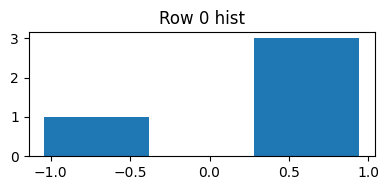

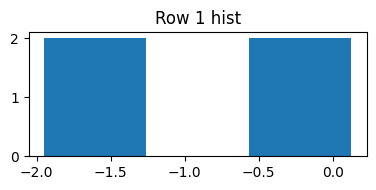

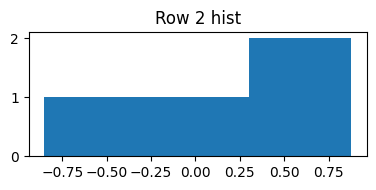

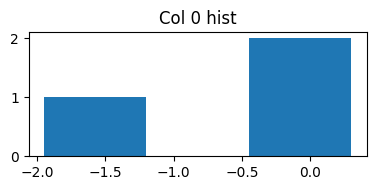

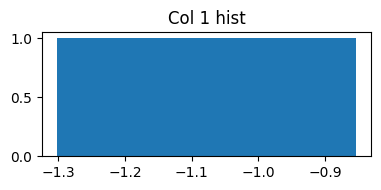

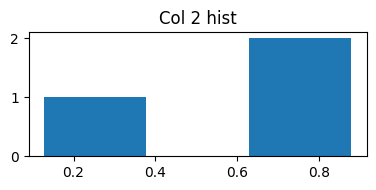

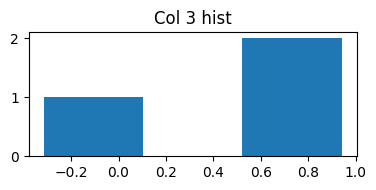

(array([[ 0.30471708, -1.03998411,  0.7504512 ,  0.94056472],
        [-1.95103519, -1.30217951,  0.1278404 , -0.31624259],
        [-0.01680116, -0.85304393,  0.87939797,  0.77779194]]),
 (array([ 0.23893722, -0.86040422,  0.19683621]),
  array([0.59847361, 0.66434516, 0.48782234])),
 (array([-0.55437309, -1.06506918,  0.58589652,  0.46737135]),
  array([0.99256151, 0.03393509, 0.10767892, 0.31144124])))

In [34]:
def analyze_random_matrix(m: int, n: int, mu: float = 0.0, sigma: float = 1.0, seed: int = None):
    rng = np.random.default_rng(seed)
    M = rng.normal(loc=mu, scale=sigma, size=(m,n))
    mean_rows = M.mean(axis=1)
    var_rows = M.var(axis=1, ddof=0)
    mean_cols = M.mean(axis=0)
    var_cols = M.var(axis=0, ddof=0)

    for i in range(m):
        plt.figure(figsize=(4,2))
        plt.title(f"Row {i} hist")
        plt.hist(M[i,:], bins='auto')
        plt.tight_layout()
        plt.show()
    for j in range(n):
        plt.figure(figsize=(4,2))
        plt.title(f"Col {j} hist")
        plt.hist(M[:,j], bins='auto')
        plt.tight_layout()
        plt.show()
    return M, (mean_rows, var_rows), (mean_cols, var_cols)

analyze_random_matrix(3,4, seed=42)

<h1>Задача 5.</h1> Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [35]:
def chess(m: int, n: int, a, b) -> np.ndarray:
    M = np.empty((m, n), dtype=object)
    for i in range(m):
        for j in range(n):
            M[i,j] = a if ((i+j) % 2 == 0) else b
    return M

npt.assert_array_equal(chess(2,3,1,0), np.array([[1,0,1],[0,1,0]], dtype=object))
npt.assert_array_equal(chess(1,1,'x','y'), np.array([['x']], dtype=object))


<h1>Задача 6.</h1> Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
<h3>Примечание:</h3> уравнение эллипса (границы овала) можно записать как: $\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [36]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = np.zeros((m, n, 3), dtype=np.uint8)
    img[:,:,:] = background_color

    cx, cy = n // 2, m // 2

    x_start = max(cx - a // 2, 0)
    x_end   = min(cx + (a + 1) // 2, n)
    y_start = max(cy - b // 2, 0)
    y_end   = min(cy + (b + 1) // 2, m)

    img[y_start:y_end, x_start:x_end] = rectangle_color
    return img

def draw_ellipse(a, b, m, n, ellipse_color, background_color):

    img = np.zeros((m, n, 3), dtype=np.uint8)
    img[:,:,:] = background_color

    y, x = np.ogrid[0:m, 0:n]
    cx, cy = n / 2, m / 2

    mask = ((x - cx)**2) / a**2 + ((y - cy)**2) / b**2 <= 1
    img[mask] = ellipse_color

    return img

rect_img = draw_rectangle(4, 2, 10, 10, (255,0,0), (0,0,0))
assert (rect_img[10//2, 10//2] == np.array([255,0,0])).all()
assert (rect_img[0,0] == np.array([0,0,0])).all()

ellipse_img = draw_ellipse(3, 2, 11, 11, (0,255,0), (10,10,10))
assert (ellipse_img[11//2, 11//2] == np.array([0,255,0])).all()
assert (ellipse_img[0,0] == np.array([10,10,10])).all()

<h1>Задача 7.</h1> Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h3>Примечание:</h3> метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [37]:
def timeseries_stats(series: np.ndarray, window: int = 3):
    s = np.asarray(series).reshape(-1)
    mean = s.mean()
    var = s.var(ddof=0)
    std = s.std(ddof=0)
    local_max = []
    local_min = []
    for i in range(1, len(s)-1):
        if s[i] > s[i-1] and s[i] > s[i+1]:
            local_max.append(i)
        if s[i] < s[i-1] and s[i] < s[i+1]:
            local_min.append(i)
    if window <= 0:
        raise ValueError
    if window > len(s):
        ma = np.array([])
    else:
        kernel = np.ones(window) / window
        ma = np.convolve(s, kernel, mode='valid')
    return {"mean": mean, "var": var, "std": std, "local_max": local_max, "local_min": local_min, "ma": ma}

series = np.array([1,3,2,5,4,4,6])
res = timeseries_stats(series, window=3)
assert np.isclose(res["mean"], series.mean())
assert np.isclose(res["var"], series.var())
assert res["local_max"] == [1,3]
assert res["local_min"] == [2]
n_expected = len(series) - 3 + 1
npt.assert_allclose(res["ma"], np.convolve(series, np.ones(3)/3, mode='valid'))

<h1> Задача 8.</h1> Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора

One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [38]:
def one_hot_encode(labels: List[int]) -> np.ndarray:
    lbl = np.asarray(labels, dtype=int).reshape(-1)
    if lbl.size == 0:
        return np.zeros((0,0), dtype=int)
    num_classes = int(lbl.max()) + 1
    res = np.zeros((lbl.size, num_classes), dtype=int)
    rows = np.arange(lbl.size)
    res[rows, lbl] = 1
    return res

v = [0,2,3,0]
res = one_hot_encode(v)
npt.assert_array_equal(res, np.array([[1,0,0,0],[0,0,1,0],[0,0,0,1],[1,0,0,0]]))